In [1]:
from __future__ import division, print_function

%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["font.size"] = 20

In [2]:
import os
import ketu
import numpy as np
import matplotlib.pyplot as pl
from transit import SimpleSystem

In [16]:
campaign = 1
# epicid = "201367065"
# epicid = "201912552"
epicid = "201649426"
basepath = "/Users/dfm/data/k2"
light_curve_file = os.path.join(basepath, "lightcurves/c{0}".format(campaign),
                                "{0}00000/{1}000/ktwo{2}-c{3:02d}_lpd-lc.fits"
                                .format(epicid[:4], epicid[4:6], epicid, campaign))

query = dict(
    invert=True,
    light_curve_file=light_curve_file,
    basis_file=os.path.join(basepath, "elcs/c{0}-norm.h5".format(campaign)),
    catalog_file=os.path.join(basepath, "catalogs/epic.h5"),
    nbasis=500,
    initial_time=1975.0,
    skip=50,
#     initial_time=2015.,
#     skip=0,
    durations=[0.05, 0.1, 0.2],
    min_period=3.,
    max_period=50.,
    npeaks=4,
    # use_gp=False,
)

In [17]:
pipe = ketu.k2.Data(cache=False)
pipe = ketu.k2.Likelihood(pipe, cache=False)
pipe = ketu.OneDSearch(pipe, cache=True)
# pipe = ketu.TwoDSearch(pipe, cache=False)
pipe = ketu.IterativeTwoDSearch(pipe, cache=True)
pipe = ketu.Vetter(pipe, cache=False)

In [18]:
r = pipe.query(**query)

Querying Data
Finished querying Data in 0.51s
Querying Likelihood
tau = 2.47686767578
tau = 8.82702636719
tau = 2.55322265625
tau = 6.78326416016
Finished querying Likelihood in 4.68s
Querying OneDSearch
Finished querying OneDSearch in 45.45s
Querying IterativeTwoDSearch
Finished querying IterativeTwoDSearch in 156.43s
Querying Vetter
Finished querying Vetter in 10.75s


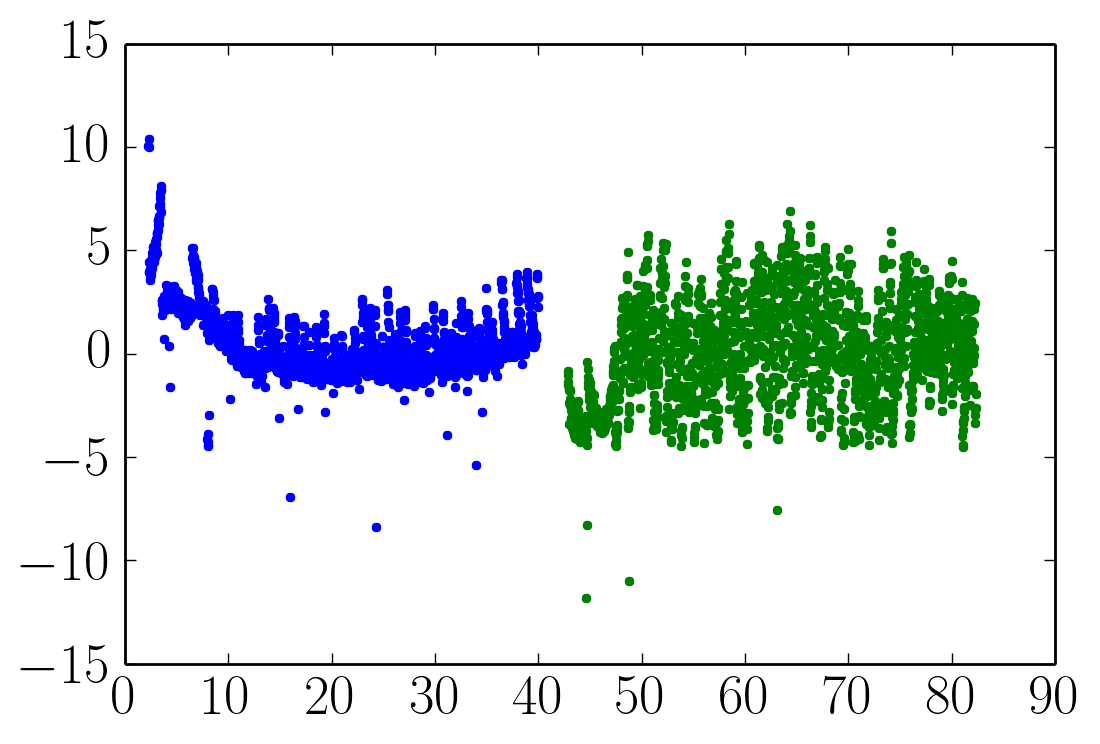

In [19]:
lcs = r.model_light_curves
[pl.plot(lc.time, lc.flux, ".") for lc in lcs];

In [20]:
r.peaks

[{'depth': 3.4056467475509509,
  'depth_ivar': 45.13210690119169,
  'duration': 0.2,
  'lnZ_box': -2516.6548968249181,
  'lnZ_none': -2770.2704683939201,
  'lnZ_transit': -2424.137860573841,
  'lnlike_box': -2515.6702687134411,
  'lnlike_none': -2770.2704683939201,
  'lnlike_transit': -2404.2756080645768,
  'period': 40.828441336249412,
  'phic_same': -1608.115674173772,
  'phic_same_second': -1631.0035323473362,
  'phic_variable': -3436.3586987205449,
  's2n': 22.879282598569006,
  't0': 8.0626953125000114,
  'transit_b': 0.49085123307667117,
  'transit_duration': 0.15569363313788012,
  'transit_period': 40.794532107505795,
  'transit_q1': 0.50361076603405597,
  'transit_q2': 0.50040747315505041,
  'transit_ror': 0.065503503240317257,
  'transit_t0': 8.042422075242305},
 {'depth': 3.0994040841037007,
  'depth_ivar': 28.623875672121862,
  'duration': 0.05,
  'lnZ_box': -2276.9590628853648,
  'lnZ_none': -2404.2773210774581,
  'lnZ_transit': -1961.2360479287124,
  'lnlike_box': -2276.20

(12.923330499098885, 18.923330499098885)

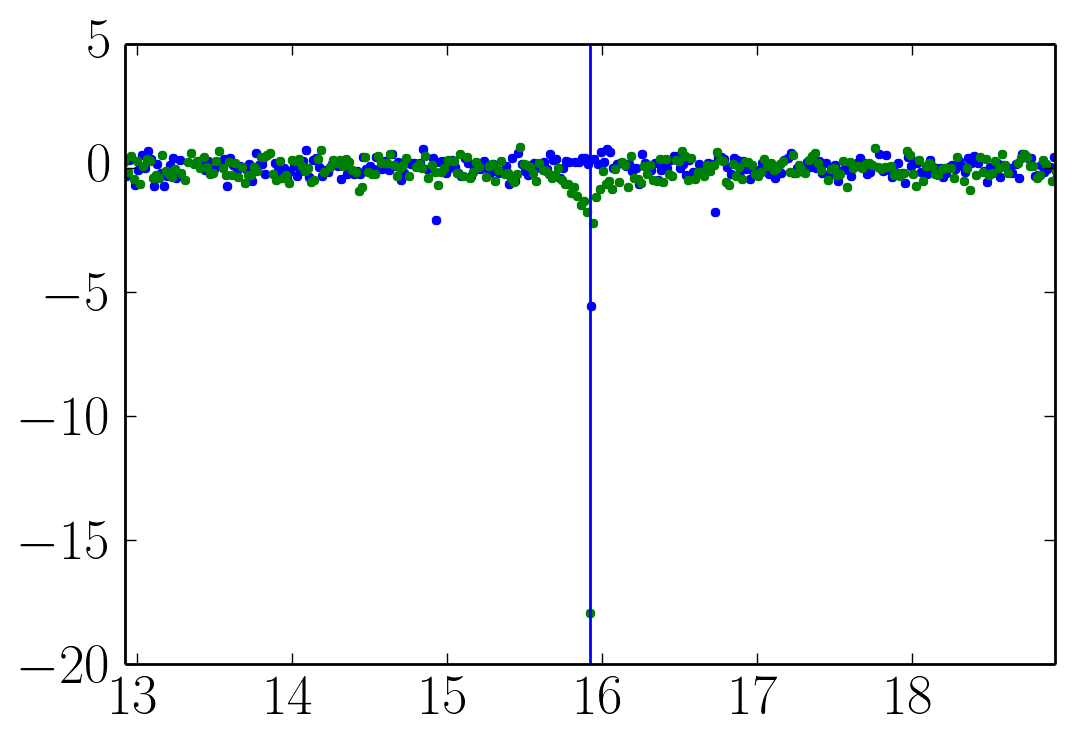

In [21]:
p = r.peaks[1]

s = SimpleSystem(period=p["transit_period"],
                 t0=p["transit_t0"],
                 ror=p["transit_ror"],
                 impact=p["transit_b"],
                 duration=p["transit_duration"],
                 q1=p["transit_q1"],
                 q2=p["transit_q2"])

[pl.plot(lc.time % (p["transit_period"]), lc.flux - lc.predict(lc.flux - 1e3*(s.light_curve(lc.time)-1.0)), ".") for lc in lcs]
pl.gca().axvline(p["transit_t0"]);
pl.xlim(p["transit_t0"]-3, p["transit_t0"]+3)